# Fake News Detection

*Dr.A.P.J.Abdul Kalam UIT Jhabua*

---
### GUIDE DETAILS:
- **Prof. Lalsingh Chouhan**
### TEAM DETAILS:
- **Lakshman Bhabor**
- **Manish Kumar Nahta**


---



## Introduction

In this project, we will build a fake news detection model using Natural Language Processing (NLP) techniques. We have a dataset consisting of genuine and fake articles' titles and text, and our goal is to distinguish between them.

## Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Load and Explore the Dataset

In [3]:
# Load the dataset
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')

# Add labels to indicate real and fake news
true_df['label'] = 0
false_df['label'] = 1


In [4]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
#Fake dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
# Concatenate both datasets
data = pd.concat([true_df, false_df])

In [7]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


## Step 3: Data Preprocessing

In [8]:
import string

# Remove punctuations
data['title'] = data['title'].str.replace('[{}]'.format(string.punctuation), '')
data['text'] = data['text'].str.replace('[{}]'.format(string.punctuation), '')

# Convert text to lowercase
data['title'] = data['title'].str.lower()
data['text'] = data['text'].str.lower()

In [9]:
# tokenization
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

In [10]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

In [11]:
# Remove empty rows
data.dropna(subset=['title', 'text'], inplace=True)

In [12]:
# Reset the index
data.reset_index(drop=True, inplace=True)

In [13]:
# Display the processed data
data

,title,text,subject,date,label
0,"[u.s., budget, fight, looms, ,, republicans, f...","[washington, (, reuters, ), -, head, conservat...",politicsNews,"December 31, 2017",0
1,"[u.s., military, accept, transgender, recruits...","[washington, (, reuters, ), -, transgender, pe...",politicsNews,"December 29, 2017",0
2,"[senior, u.s., republican, senator, :, 'let, m...","[washington, (, reuters, ), -, special, counse...",politicsNews,"December 31, 2017",0
3,"[fbi, russia, probe, helped, australian, diplo...","[washington, (, reuters, ), -, trump, campaign...",politicsNews,"December 30, 2017",0
4,"[trump, wants, postal, service, charge, 'much,...","[seattle/washington, (, reuters, ), -, preside...",politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,"[mcpain, :, john, mccain, furious, iran, treat...","[21st, century, wire, says, 21wire, reported, ...",Middle-east,"January 16, 2016",1
44894,"[justice, ?, yahoo, settles, e-mail, privacy, ...","[21st, century, wire, says, familiar, theme, ....",Middle-east,"January 16, 2016",1
44895,"[sunnistan, :, us, allied, ‘, safe, zone, ’, p...","[patrick, henningsen, 21st, century, wireremem...",Middle-east,"January 15, 2016",1
44896,"[blow, $, 700, million, :, al, jazeera, americ...","[21st, century, wire, says, al, jazeera, ameri...",Middle-east,"January 14, 2016",1


## Step 4: Feature Extraction (TF-IDF)

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))


## Step 5: Split the Data into Training and Testing Sets

In [15]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


# Step 6: Model Training

 Training our model with different algorithms using the training data and evaluating its performance on the testing data.



# **Decision Tree**

Decision Tree Accuracy: 0.9968819599109131


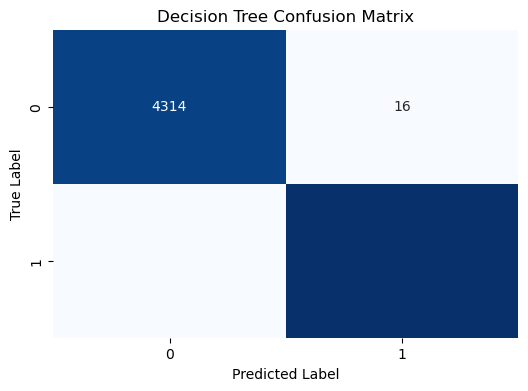

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



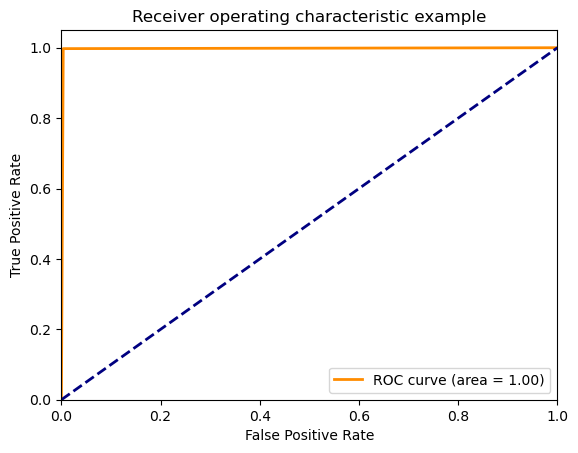

In [16]:
# prompt: Decision Tree - Accuracy, visual of Confusion Matrix,  Classification Report,  ROC Curve

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC Curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
lw = 2
plt.plot(fpr_dt, tpr_dt, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# **Passive Aggressive Classifier**

Passive Aggressive Classifier Accuracy: 0.9964365256124722


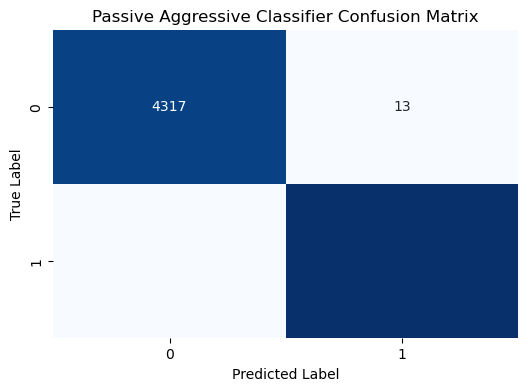

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



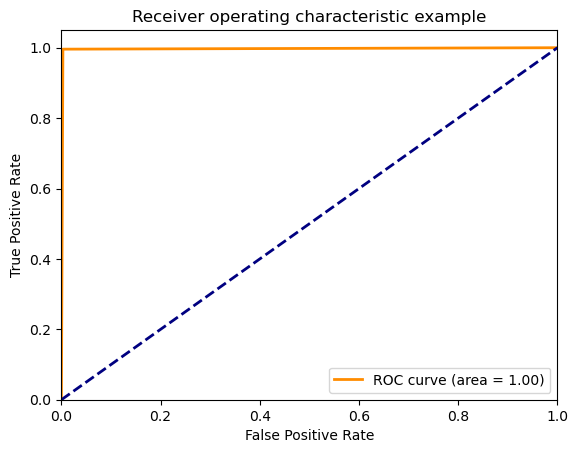

In [17]:
# prompt: Passive Aggressive Classifier- Accuracy, visual of Confusion Matrix,  Classification Report,  ROC Curve

import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
# Passive Aggressive Classifier
pa_model = PassiveAggressiveClassifier()
pa_model.fit(X_train, y_train)
y_pred_pa = pa_model.predict(X_test)
accuracy_pa = accuracy_score(y_test, y_pred_pa)
print("Passive Aggressive Classifier Accuracy:", accuracy_pa)

# Confusion Matrix
cm_pa = confusion_matrix(y_test, y_pred_pa)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_pa, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Passive Aggressive Classifier Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_pa))

# ROC Curve and AUC
fpr_pa, tpr_pa, thresholds_pa = roc_curve(y_test, y_pred_pa)
roc_auc_pa = auc(fpr_pa, tpr_pa)

plt.figure()
lw = 2
plt.plot(fpr_pa, tpr_pa, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_pa)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# **Logistic Regression**

Logistic Regression Accuracy: 0.9918708240534521


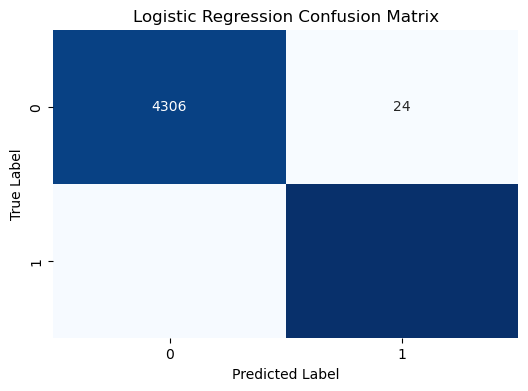

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



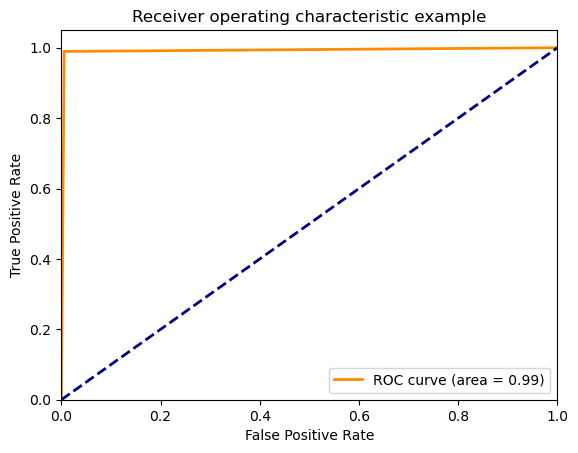

In [18]:
# prompt: Logistic Regression - Accuracy, visual of Confusion Matrix,  Classification Report,  ROC Curve

import matplotlib.pyplot as plt
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
lw = 2
plt.plot(fpr_lr, tpr_lr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#Random forest

Random Forest Accuracy: 0.998218262806236


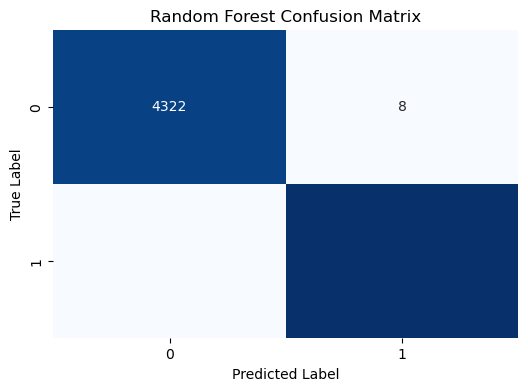

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



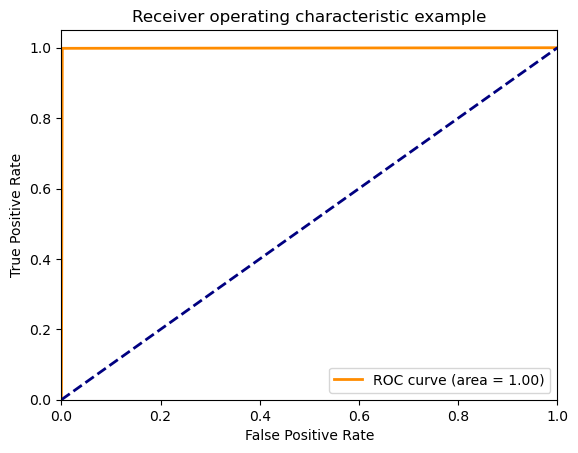

In [19]:
# prompt: Random forest- Accuracy, visual of Confusion Matrix,  Classification Report,  ROC Curve

import matplotlib.pyplot as plt
# **Random Forest**

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate the ROC Curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#Step 7: Model Validation and Evaluation


In [20]:
import matplotlib.pyplot as plt
# Model Validation and Evaluation

# Calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_pa = accuracy_score(y_test, y_pred_pa)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of each model
print("Decision Tree Accuracy:", accuracy_dt)
print("Passive Aggressive Classifier Accuracy:", accuracy_pa)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Random Forest Accuracy:", accuracy_rf)

Decision Tree Accuracy: 0.9968819599109131
Passive Aggressive Classifier Accuracy: 0.9964365256124722
Logistic Regression Accuracy: 0.9918708240534521
Random Forest Accuracy: 0.998218262806236


In [21]:
# Print the classification report for each model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Passive Aggressive Classifier Classification Report:")
print(classification_report(y_test, y_pred_pa))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Passive Aggressive Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4330
           1       1.00      1.00      1.00      4650

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4330
           1       0.99      0.99      0.99      4650

    accuracy                           0.99      

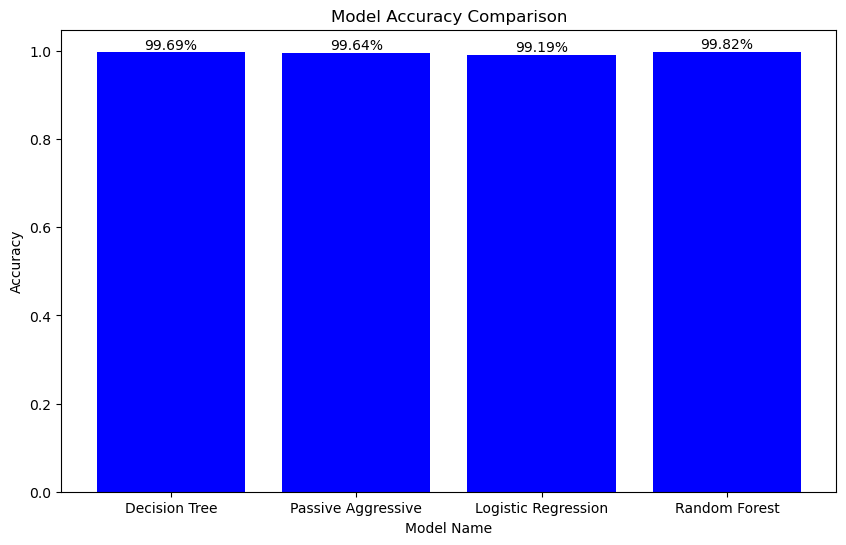

In [22]:
# prompt: names and their corresponding metrics visual with present %

import matplotlib.pyplot as plt
# Create a list of model names and their corresponding metrics
model_names = ['Decision Tree', 'Passive Aggressive', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_dt, accuracy_pa, accuracy_lr, accuracy_rf]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue')

# Add percentage labels above each bar
for i, value in enumerate(accuracy_scores):
    plt.text(i, value, f'{value:.2%}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14464\865720763.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_14464\865720763.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_14464\865720763.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\User\AppData\Local\Temp\ipykernel_14464\865720763.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

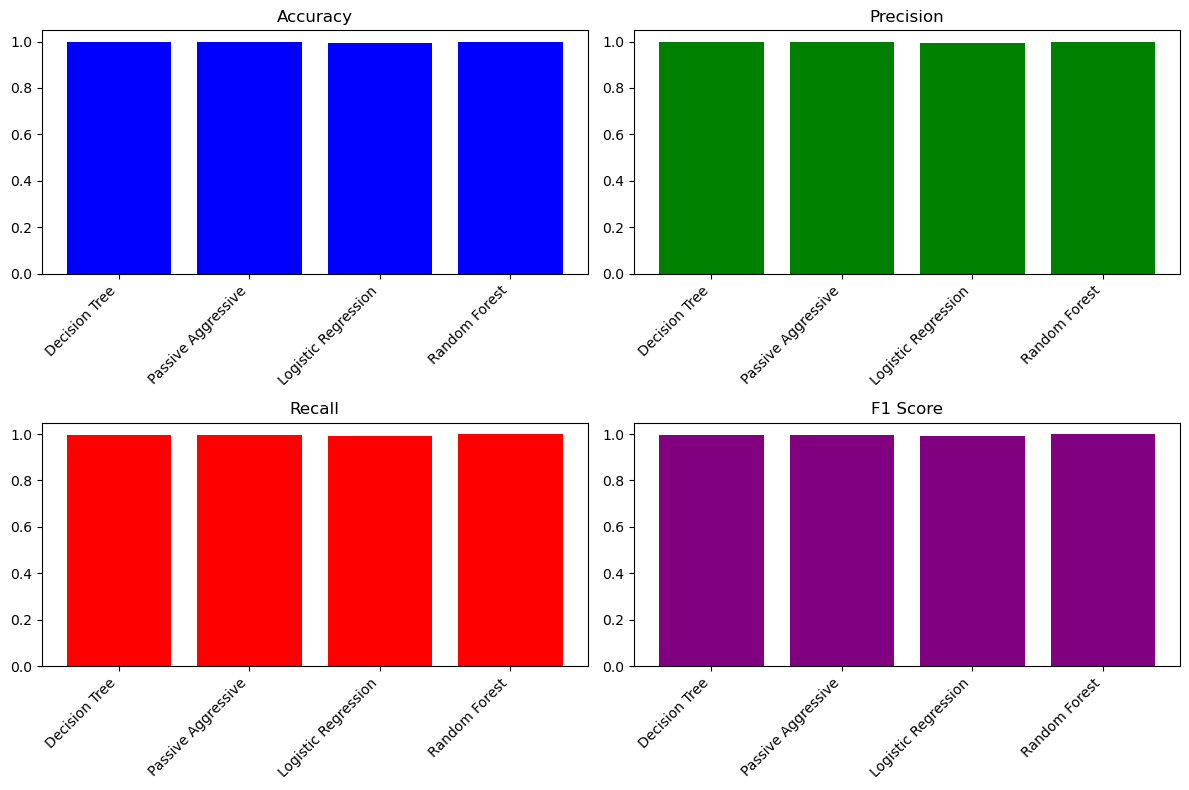

In [23]:
# prompt: bar chart for model in accuracy,precision,recall,F1 score

import matplotlib.pyplot as plt
# Calculate metrics for each model
dt_metrics = classification_report(y_test, y_pred_dt, output_dict=True)
pa_metrics = classification_report(y_test, y_pred_pa, output_dict=True)
lr_metrics = classification_report(y_test, y_pred_lr, output_dict=True)
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract desired metrics
dt_accuracy = dt_metrics['accuracy']
dt_precision = dt_metrics['weighted avg']['precision']
dt_recall = dt_metrics['weighted avg']['recall']
dt_f1_score = dt_metrics['weighted avg']['f1-score']

pa_accuracy = pa_metrics['accuracy']
pa_precision = pa_metrics['weighted avg']['precision']
pa_recall = pa_metrics['weighted avg']['recall']
pa_f1_score = pa_metrics['weighted avg']['f1-score']

lr_accuracy = lr_metrics['accuracy']
lr_precision = lr_metrics['weighted avg']['precision']
lr_recall = lr_metrics['weighted avg']['recall']
lr_f1_score = lr_metrics['weighted avg']['f1-score']

rf_accuracy = rf_metrics['accuracy']
rf_precision = rf_metrics['weighted avg']['precision']
rf_recall = rf_metrics['weighted avg']['recall']
rf_f1_score = rf_metrics['weighted avg']['f1-score']

# Create data for bar chart
model_names = ['Decision Tree', 'Passive Aggressive', 'Logistic Regression', 'Random Forest']
accuracy_scores = [dt_accuracy, pa_accuracy, lr_accuracy, rf_accuracy]
precision_scores = [dt_precision, pa_precision, lr_precision, rf_precision]
recall_scores = [dt_recall, pa_recall, lr_recall, rf_recall]
f1_scores = [dt_f1_score, pa_f1_score, lr_f1_score, rf_f1_score]

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy bar chart
axes[0, 0].bar(model_names, accuracy_scores, color='blue')
axes[0, 0].set_title('Accuracy')

# Plot precision bar chart
axes[0, 1].bar(model_names, precision_scores, color='green')
axes[0, 1].set_title('Precision')

# Plot recall bar chart
axes[1, 0].bar(model_names, recall_scores, color='red')
axes[1, 0].set_title('Recall')

# Plot F1 score bar chart
axes[1, 1].bar(model_names, f1_scores, color='purple')
axes[1, 1].set_title('F1 Score')

# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


# **MODEL VALIDATION**
## *News Prediction*

In [36]:
# prompt: predict

def predict_news(model, text):
  text_tfidf = tfidf_vectorizer.transform([text])
  prediction = model.predict(text_tfidf)[0]
  if prediction == 0:
    return "True News"
  else:
    return "Fake News"

# Example usage
model = rf_model  # You can choose any of the trained models
text = " "
prediction = predict_news(model, text)
print(f"Predicted News Type: {prediction}")


Predicted News Type: Fake News


In [37]:
# prompt: save model,vector

import pickle

# Save the model
with open('model.pkl', 'wb') as f:
  pickle.dump(rf_model, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(tfidf_vectorizer, f)
